# Argon worksheet compute everything

## Import all functions from ArgonFunc

In [19]:
import ArgonFunc as ar
from imp import reload
reload(ar);
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

### Compute Cv using a energy conserving program
First, gas conditions where rho = 0.01 and T = 2 

Then, solid conditions where rho = 0.99 and T = 0.1

Cv/kb/N =  1.5124139856


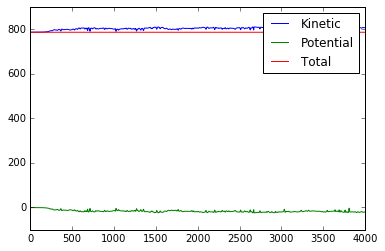

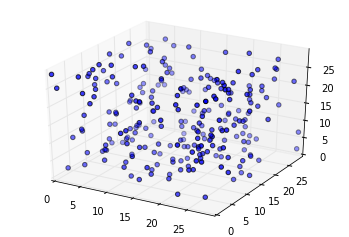

In [2]:
# --------- conserve E program --------------
# gas conditions where rho = 0.01 and T = 2 
pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(rhopar=0.01,Tpar=2,npar=4,tfinpar=4000)
pos2,vel2,K,V,rV = ar.evolveTimeConserveE(pos,vel,timesteps,N,L,dt)

Cv = 1 / (2/(3*N) - np.var(K[200::])/(K[200::].mean()**2))
print("Cv/kb/N = ",Cv/N)

ar.plotEnergy(timesteps,K,V)
ar.plotParticles(pos2,L)
ar.plt.show()

Cv/kb/N =  3.02937199979


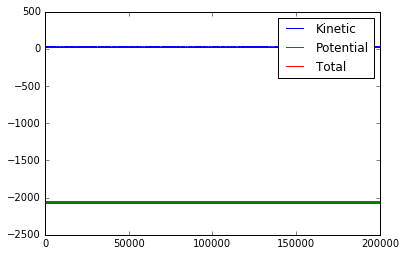

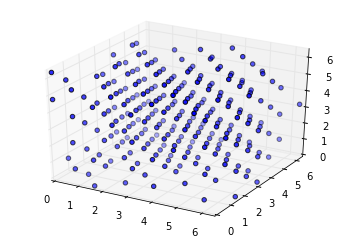

In [3]:
# --------- conserve E program --------------
# solid conditions where rho = 0.99 and T = 0.1
pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(0.99,0.1,4,200000)
pos2,vel2,K,V,rV = ar.evolveTimeConserveE(pos,vel,timesteps,N,L,dt)

Cv = 1 / (2/(3*N) - np.var(K[2000::])/(K[2000::].mean()**2))
print("Cv/kb/N = ",Cv/N)

ar.plotEnergy(timesteps,K,V)
ar.plotParticles(pos2,L)
ar.plt.show()

### Find the pressure for various densities and temperatures

In [18]:
# -------- Fixed T program ------------------
# TO-DO: Betere array maken
Tij, rhoij = np.meshgrid(np.array([1,1.35,2.74]),np.array([.1, .2, .3, .4, .5, .6, .7, .8]))
Pij = np.zeros_like(Tij)

for i in range(Tij.shape[0]):
    for j in range(Tij.shape[1]):
        pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(rhoij[i][j],Tij[i][j],4,10000)
        pos2,vel2,K,V,rV = ar.evolveTimeFixedT(pos,vel,timesteps,N,L,dt,T)
        Pij[i][j] = np.mean(1/(L**3) * ( 2*K - rV )/3)

        
ar.plotPversusRho(rhoij,Tij,Pij)        

0.05420677062
0.0985599957471
0.266988514608
0.0301395250879
0.140132432911
0.541301133262
-0.0149701305116
0.15879844622
0.880066973041
-0.0951497575287
0.168463318129
1.34033767819
-0.191879317441
0.270844602842
2.07861188565
-0.223690392042
0.524383257457
3.18175604842
0.115776610898
1.21102446962
5.08560237679
1.18442834581
2.81635191627
8.18046133201
[[ 0.05420677  0.09856     0.26698851]
 [ 0.03013953  0.14013243  0.54130113]
 [-0.01497013  0.15879845  0.88006697]
 [-0.09514976  0.16846332  1.34033768]
 [-0.19187932  0.2708446   2.07861189]
 [-0.22369039  0.52438326  3.18175605]
 [ 0.11577661  1.21102447  5.08560238]
 [ 1.18442835  2.81635192  8.18046133]]


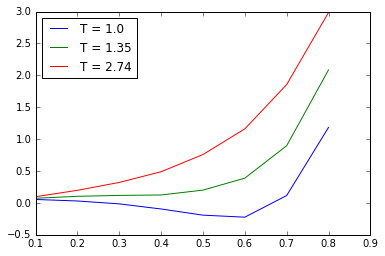

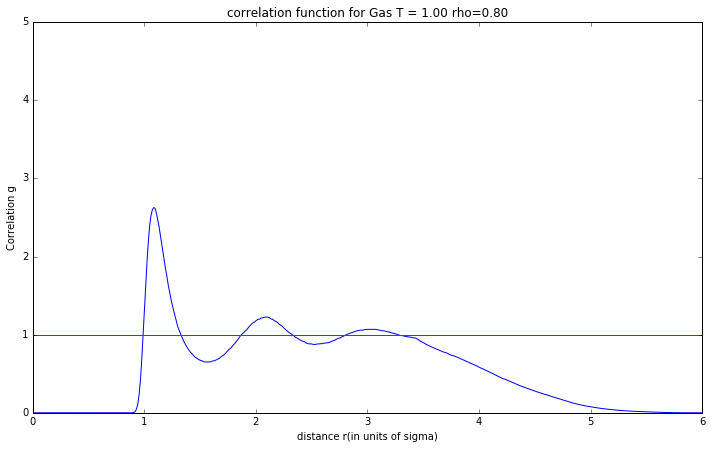

In [29]:
#for gas

pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(0.8,1,4,10000)
pos2,vel2,K,V,rV, nr = ar.evolveTimeFixedTAndCalcG(pos,vel,timesteps,N,L,dt,T, 1000)
rVec, g = ar.correlation(N, L, len(nr[0,:]), nr, 2000)
plt.figure(figsize = (12,7))
plt.plot(rVec, g)
plt.ylim((0,5))
plt.xlim((0,6))
plt.xlabel('distance r(in units of sigma)')
plt.ylabel('Correlation g')
plt.axhline(1, color="r")
plt.title("correlation function for Gas T = %.2f rho=%.2f" % (T, rho))

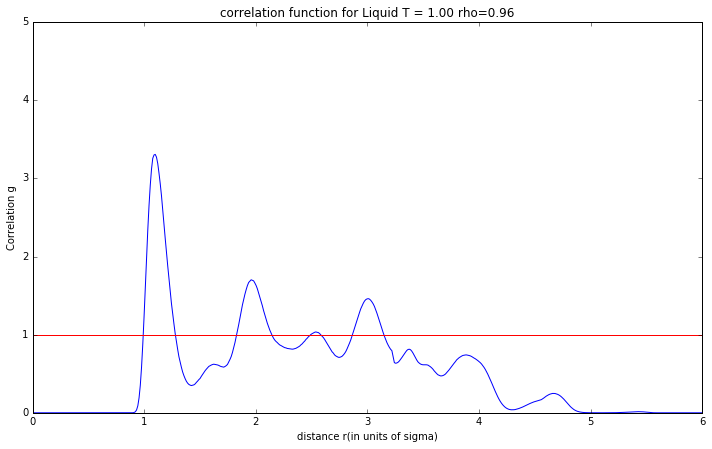

In [32]:
#for liquid

pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(0.96,1,4,10000)
pos2,vel2,K,V,rV, nr = ar.evolveTimeFixedTAndCalcG(pos,vel,timesteps,N,L,dt,T, 1000)
rVec, g = ar.correlation(N, L, len(nr[0,:]), nr, 2000)
plt.figure(figsize = (12,7))
plt.plot(rVec, g)
plt.ylim((0,5))
plt.xlim((0,6))
plt.xlabel('distance r(in units of sigma)')
plt.ylabel('Correlation g')
plt.axhline(1, color="r")
plt.title("correlation function for Liquid T = %.2f rho=%.2f" % (T, rho))

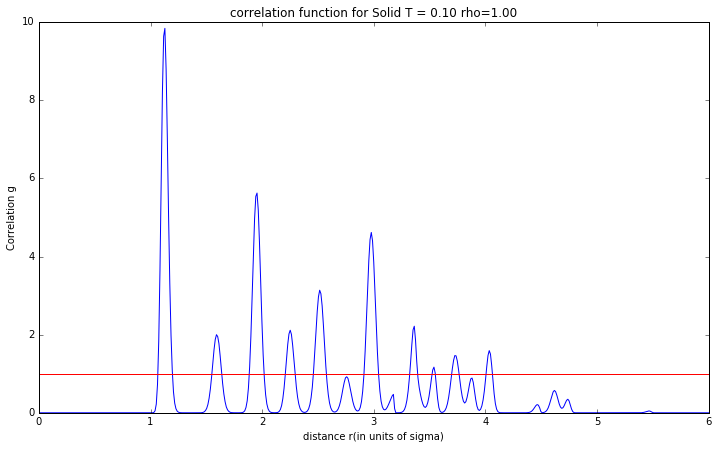

In [31]:
#for solid

pos,vel,rho,T,n,timesteps,dt,N,L = ar.init_params(1.0,0.1,4,10000)
pos2,vel2,K,V,rV, nr = ar.evolveTimeFixedTAndCalcG(pos,vel,timesteps,N,L,dt,T, 1000)
rVec, g = ar.correlation(N, L, len(nr[0,:]), nr, 2000)
plt.figure(figsize = (12,7))
plt.plot(rVec, g)
plt.ylim((0,10))
plt.xlim((0,6))
plt.xlabel('distance r(in units of sigma)')
plt.ylabel('Correlation g')
plt.axhline(1, color="r")
plt.title("correlation function for Solid T = %.2f rho=%.2f" % (T, rho))